In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

In [12]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain

In [13]:
%matplotlib inline

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [7]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

01/28/2020 15:49:52 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:49:53 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:49:54 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:49:54 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:49:55 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run0

01/28/2020 15:50:20 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:50:20 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:50:21 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:50:22 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run05_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:50:23 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run0

In [8]:
dtfa.load_state('data/haxby_norest_k100_n1000_01242020_204921') 

In [9]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100)

01/28/2020 15:51:05 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:06 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:07 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:08 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:09 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run0

01/28/2020 15:51:34 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:35 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:35 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:36 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run05_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/28/2020 15:51:37 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run0

In [10]:
htfa.load_state('data/haxby_norest_k100_n1500_01252020_003420')

In [22]:
def task_labeler(task):
    return task

def block_task_labeler(b):
    return b.task


In [23]:
def subject_labeler(subject):
    return subject

def block_subject_labeler(block):
    return 'Subject %d' % block.subject

In [61]:
def classification_pipeline(data,targets,scoring="roc_auc",input_data=False,print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    feature_selection = SelectPercentile(f_classif, percentile=5)
    for category in categories:
        print("Processing %s" % (category))
        svc = SVC(C=1., kernel="linear")
        if input_data:
            classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
        else:
            classifier = svc
        dummy_classifier = DummyClassifier()

        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance

In [58]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()


In [60]:
### task classification using leave one out runs on NTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_weights_dtfa[i,:,:].mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance

Processing Subject 1
Processing bottle
Scores: 0.8701 +- 0.2150
Chance Scores: 0.5325 +- 0.2287
Processing cat
Scores: 0.8831 +- 0.1591
Chance Scores: 0.4870 +- 0.1517
Processing chair
Scores: 0.8701 +- 0.2150
Chance Scores: 0.5260 +- 0.2160
Processing face
Scores: 0.9870 +- 0.0411
Chance Scores: 0.4545 +- 0.0551
Processing house
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4416 +- 0.0595
Processing scissors
Scores: 0.8831 +- 0.1909
Chance Scores: 0.4870 +- 0.1548
Processing scrambledpix
Scores: 0.9870 +- 0.0411
Chance Scores: 0.4481 +- 0.0535
Processing shoe
Scores: 0.8831 +- 0.2181
Chance Scores: 0.5455 +- 0.2004
...
Overall Score: 0.9205 +- 0.1694
Overall Dummy Score: 0.4903 +- 0.1609


Processing Subject 2
Processing bottle
Scores: 0.8095 +- 0.2497
Chance Scores: 0.4821 +- 0.0881
Processing cat
Scores: 0.9405 +- 0.1363
Chance Scores: 0.5000 +- 0.1912
Processing chair
Scores: 0.8690 +- 0.1593
Chance Scores: 0.4881 +- 0.1974
Processing face
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4881

In [38]:
### task classification using leave one out runs on HTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_weights_htfa[i,:,:].mean(0))
            targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

htfa_summary_result = summary_result

Processing Subject 1
Processing bottle
Scores: 0.6234 +- 0.3296
Chance Scores: 0.4545 +- 0.1783
Processing cat
Scores: 0.8442 +- 0.1663
Chance Scores: 0.4675 +- 0.0356
Processing chair
Scores: 0.8831 +- 0.1469
Chance Scores: 0.5130 +- 0.2084
Processing face
Scores: 0.9610 +- 0.0636
Chance Scores: 0.4545 +- 0.1405
Processing house
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6104 +- 0.2662
Processing scissors
Scores: 0.5584 +- 0.3416
Chance Scores: 0.4545 +- 0.0551
Processing scrambledpix
Scores: 0.8052 +- 0.2134
Chance Scores: 0.4935 +- 0.1653
Processing shoe
Scores: 0.9091 +- 0.1102
Chance Scores: 0.4481 +- 0.1432
...
Overall Score: 0.8231 +- 0.2521
Overall Dummy Score: 0.4870 +- 0.1728


Processing Subject 2
Processing bottle
Scores: 0.7143 +- 0.3689
Chance Scores: 0.4881 +- 0.1619
Processing cat
Scores: 0.6429 +- 0.2945
Chance Scores: 0.5000 +- 0.1368
Processing chair
Scores: 0.8929 +- 0.0850
Chance Scores: 0.4107 +- 0.0973
Processing face
Scores: 0.9167 +- 0.1085
Chance Scores: 0.4345

In [62]:
### task classification using leave one out runs on input data###
summary_result = []
summary_result_chance = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   input_data=True,
                                                                   print_all=True)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

voxel_summary_result = summary_result

Processing Subject 1
Processing bottle
Scores: 0.9091 +- 0.1752
Chance Scores: 0.6299 +- 0.2433
Processing cat
Scores: 0.9870 +- 0.0411
Chance Scores: 0.5390 +- 0.2074
Processing chair
Scores: 0.8961 +- 0.2029
Chance Scores: 0.5714 +- 0.1950
Processing face
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6558 +- 0.2234
Processing house
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5519 +- 0.1999
Processing scissors
Scores: 0.9610 +- 0.0881
Chance Scores: 0.4805 +- 0.1495
Processing scrambledpix
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4481 +- 0.0616
Processing shoe
Scores: 0.9870 +- 0.0411
Chance Scores: 0.4610 +- 0.1706
...
Overall Score: 0.9675 +- 0.1092
Overall Dummy Score: 0.5422 +- 0.2019


Processing Subject 2
Processing bottle
Scores: 0.9048 +- 0.1579
Chance Scores: 0.4762 +- 0.1684
Processing cat
Scores: 0.9881 +- 0.0395
Chance Scores: 0.6190 +- 0.2246
Processing chair
Scores: 0.9286 +- 0.1237
Chance Scores: 0.6012 +- 0.2533
Processing face
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5060

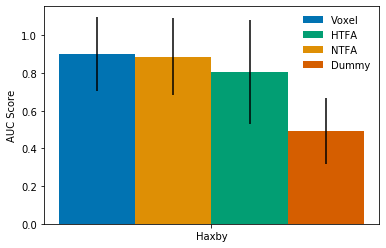

In [55]:
voxel_accuracies = np.mean(voxel_summary_result)
voxel_errs = np.std(voxel_summary_result)
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.ylabel('AUC Score')
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylim(bottom=0,)
fig.savefig('haxby_svm_accuracies.pdf')